In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [199]:
def normal(X,Y):
    p=np.dot(X,X.T)
    v=np.dot(X,Y)
    print(p.shape,v.shape)
    return np.dot(np.linalg.inv(p),v)

In [168]:
def hyp(theta,X):
    return np.dot(X.T,theta)

In [169]:
def cost(X,Y,theta):
    m=Y.shape[0]
    return (1.0/(2.0*m)) * np.sum((Y-hyp(theta,X))**2)

In [170]:
def grad(X,Y,theta):
    m=Y.shape[0]
    return (1.0/m)*np.dot(X,(hyp(theta,X)-Y))

In [171]:
def update(X,Y,theta,num_iter,alpha=0.01,debug=False):
    costhist=[]
    for i in range(num_iter):
        theta = theta - (alpha * grad(X,Y,theta))
        c=cost(X,Y,theta)
        costhist.append(c)
        if debug :
            print("Cost after " ,i," is ",c)
            
    return theta,costhist

In [172]:
def predict(X,theta):
    return hyp(theta,X)

In [173]:
data=pd.read_csv('../machine-learning-ex1/ex1/ex1data1.txt',header=None)

(97, 1) (97, 1)
(2, 97) (97, 1)


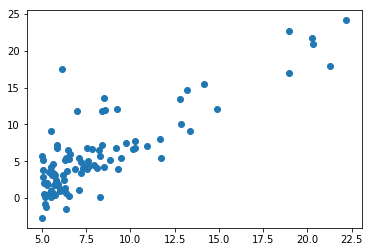

In [174]:
x,y=data[data.columns[:-1]].values.reshape(-1,1),data[data.columns[-1]].values.reshape(-1,1)
print(x.shape,y.shape)
x=np.vstack((np.ones((1,x.shape[0])),x.reshape(1,-1)))
print(x.shape,y.shape)
plt.scatter(x[1:],y)
plt.show()

In [175]:
theta=np.zeros((2,1))
print('Initial Cost : ',cost(x,y,theta))

Initial Cost :  32.0727338775


final theta by gradeint descent :  [[-3.63029144]
 [ 1.16636235]]  Final Cost by gradeint descent :  4.48338825659


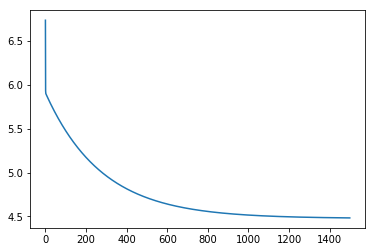

final theta by normal equation:  [[-3.89578088]
 [ 1.19303364]]  Final Cost by normal equation :  4.47697137598


In [176]:
trained_theta,cost_hist=update(x,y,theta,1500,0.01,False)
print('final theta by gradeint descent : ',trained_theta,' Final Cost by gradeint descent : ',cost(x,y,trained_theta))
plt.plot(cost_hist)
plt.show()

trained_theta_norm=normal(x,y)
print('final theta by normal equation: ',trained_theta_norm,' Final Cost by normal equation : ',cost(x,y,trained_theta_norm))

In [177]:
print('For population = 35,000, we predict a profit of ',predict(np.array([1,3.5]),trained_theta)*10000)
print('For population = 70,000, we predict a profit of ',predict(np.array([1,7]),trained_theta)*10000)

For population = 35,000, we predict a profit of  [ 4519.7678677]
For population = 70,000, we predict a profit of  [ 45342.45012945]


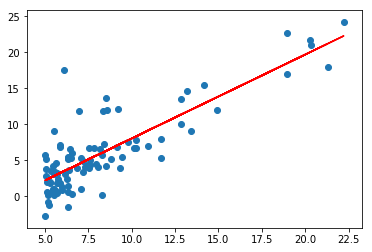

In [178]:
plt.plot(x[1:].T,hyp(trained_theta,x),'r-')
plt.scatter(x[1:],y)
plt.show()

# ex1data2.txt

In [189]:
def feature_norm(x,y):
    newx,newy=np.zeros(x.shape),np.zeros(y.shape)
    xmeans=np.mean(x,axis=0)
    ymeans=np.mean(y,axis=0)
    xsd=np.std(x,axis=0)
    ysd=np.std(y,axis=0)
    #print(xmeans,ymeans,xsd,ysd)
    for i in range(len(xmeans)):
        newx[:,i]=(newx[:,i]-xmeans[i])/float(xsd[i])
    newy=(newy-ymeans)/ysd
    return newx,newy,xmeans,xsd,ymeans,ysd

In [190]:
def predict(X,theta):
    return hyp(theta,X)

In [201]:
data=pd.read_csv('../machine-learning-ex1/ex1/ex1data2.txt',header=None)

In [202]:
xori,yori=data[data.columns[:-1]].values.reshape(-1,2),data[data.columns[-1]].values.reshape(-1,1)
print(xori.shape,yori.shape)
x,y,xmeans,xsd,ymeans,ysd=feature_norm(xori,yori)
x=np.concatenate((np.ones((1,x.shape[0])),x.reshape(2,-1)))
print(x.shape,y.shape)

(47, 2) (47, 1)
(3, 47) (47, 1)


In [203]:
theta=np.zeros((3,1))
print('Initial Cost : ',cost(x,y,theta))

Initial Cost :  3.78638005149


final theta by gradeint descent :  [[-0.1155278 ]
 [ 0.3902291 ]
 [ 0.39024536]]  Final Cost by gradeint descent :  9.1714385912e-11


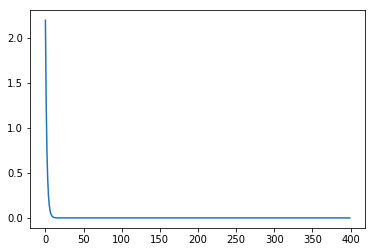

(3, 3) (3, 1)
final theta by normal equation:  [[  2.98907793e+05]
 [  2.49535683e+01]
 [  1.63590148e+01]]  Final Cost by gradeint descent :  7487859962.26


In [204]:
trained_theta,cost_hist=update(x,y,theta,400,0.01,False)
print('final theta by gradeint descent : ',trained_theta,' Final Cost by gradeint descent : ',cost(x,y,trained_theta))
plt.plot(cost_hist)
plt.show()



xori=np.concatenate((np.ones((1,xori.shape[0])),xori.reshape(2,-1)))
trained_theta_norm=normal(xori,yori)
print('final theta by normal equation: ',trained_theta_norm,' Final Cost by gradeint descent : ',cost(xori,yori,trained_theta_norm))

In [195]:
x1=(1650-xmeans[0])/xsd[0]
x2=(3-xmeans[1])/xsd[1]

In [198]:
print('The cost of 1650 feet and 3 bedroom is ',(predict(np.array([1,x1,x2]),trained_theta)*ysd)+ymeans)

The cost of 1650 feet and 3 bedroom is  [ 293675.49361026]
